# Logistic Regression Project Tutorial

In [1]:
#Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib


df = pd.read_csv("/workspaces/Machine_learning_Vicente/data/raw/bank-marketing-campaign-data.csv", sep= ';' )

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


Comprobamos el tamaño del Dataframe

In [2]:
df.shape

(41188, 21)

# Limpieza del DataSet

Comprobamos que no hay valores null viendo que el numero total es 41188

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Comprobamos la relevancia de las columnas y que no hay ninguna con un único valor. Comprobamos pues, que no hay columnas con tan solo un subnivel, por lo que no eliminamos ninguna 

In [ ]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Revisamos las columnas numéricas. Dado que su desviación estandar no es igual a 0, lo cual mostraría que en la columna se repite un unico valor, no vamos a eliminar ninguna

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


Revisamos que no hay duplicados. Los valores que se repiten se muestran por primera vez. 

In [ ]:
duplicadas = df[df.duplicated(keep=False)]

duplicadas


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no


Contamos los valores duplicados

In [ ]:
df.duplicated().sum()

np.int64(12)

Eliminamos valores duplicados

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape} ')
df.drop(df[df.duplicated()].index, inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {df.shape} ')

Tamaño del set antes de eliminar las filas repetidas: (41188, 21) 
Tamaño del set despues de eliminar las filas repetidas: (41176, 21) 


Comprobamos si hay valores faltantes con matriz

<Axes: >

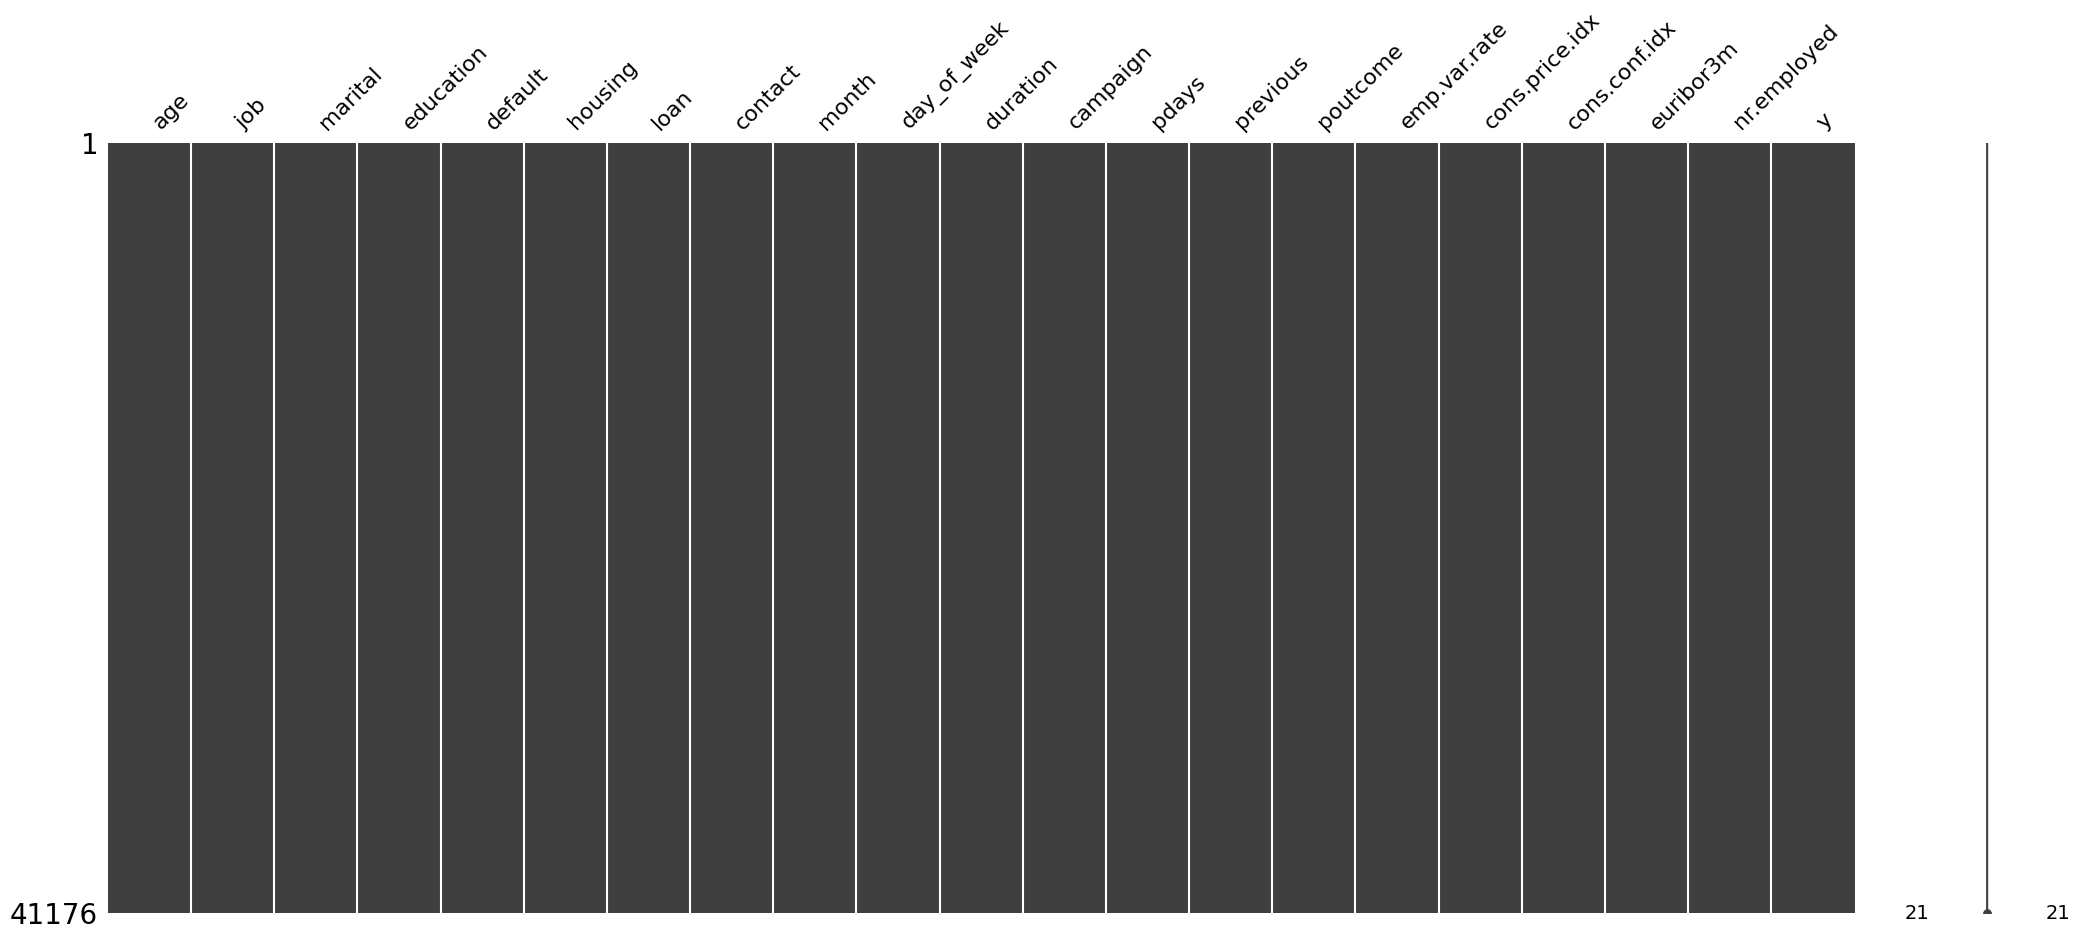

In [ ]:
msno.matrix(df)

Comprobamos el porcentaje de valores faltantes

In [10]:
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

Comprobamos si hay valores extremos o outliers. Crearemos un boxplot para las columnas numéricas

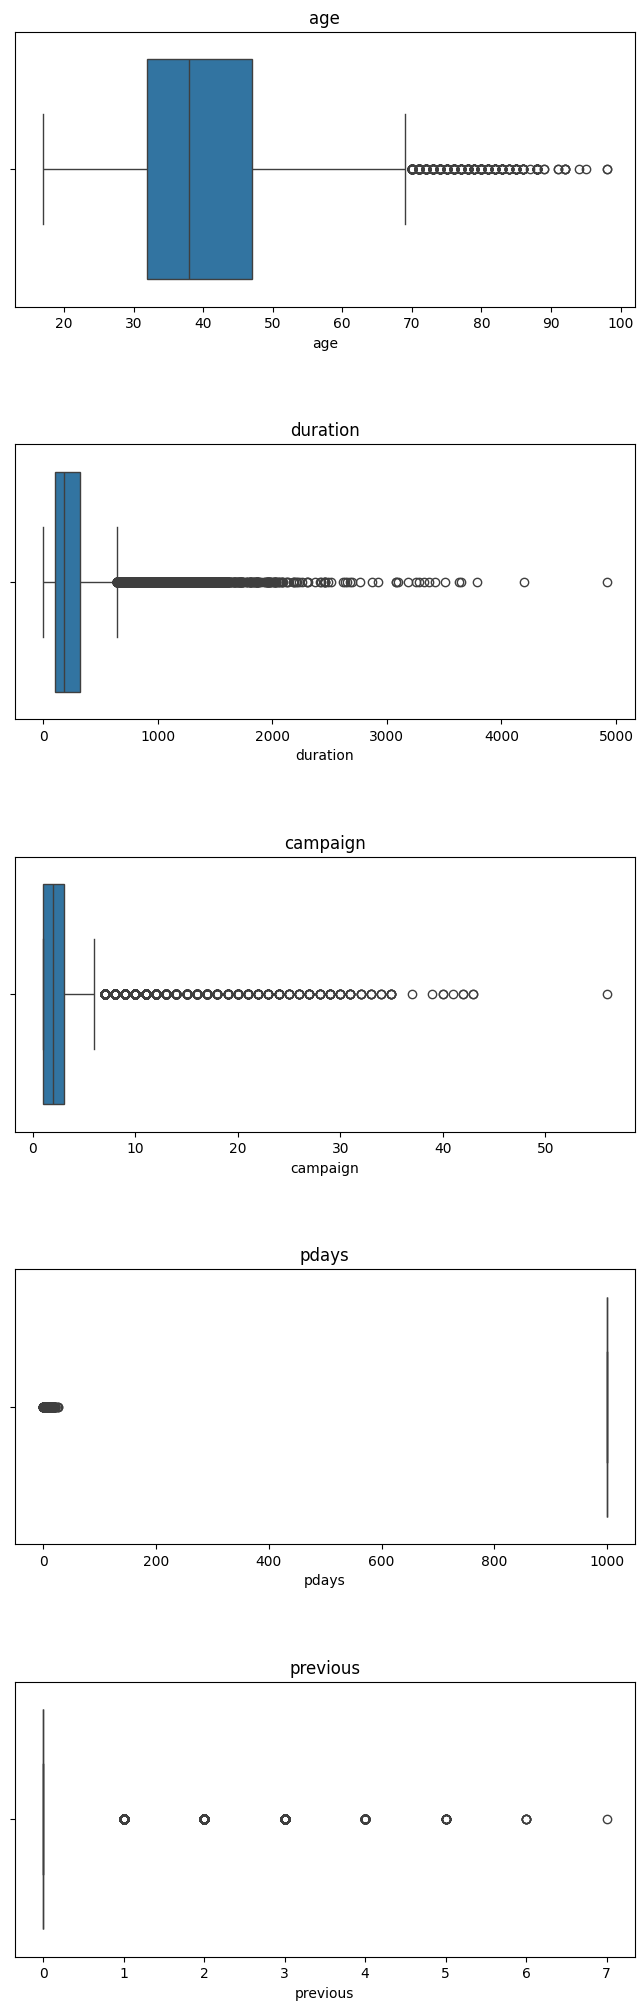

In [ ]:
cols_num= ['age', 'duration', 'campaign','pdays','previous']

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 5 * len(cols_num)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.show()


Respecto a lo que vemos en boxplot: 

Edad: No hay valores que excedan los 100 años, por lo que podemos considerarlo dentro de un rango normal.
Duración: Hace referencia en segundos a la duración de la ultima llamada. El valor mas alto habla de una llamada d aproximadamente 83 minutos (5000 segundos) y existe un numero considerable de llamadas que tiene una duración de 2200-3000 minutos, por lo que podríamos entender que no es una llamada que se haga de manera rápida. 
Campaña refiere al numero de veces que se ha contactado al cliente: Hay valores que exceden los 30,40 e incluso un valor con mas de 50 contactos. Deberíamos llegar a entender cual es la duración de dicha campaña y cuantos se consideran un número de contactos excesivos. Tengamos en cuenta que si hablamos de una campaña anual, el valor mas alto entiende que se le ha contactado una media de 4 veces por mes. 

No obstante, no se observan outliers acusados o valores negativos que deban ser eliminados


Posibles errores en columnas categóricas

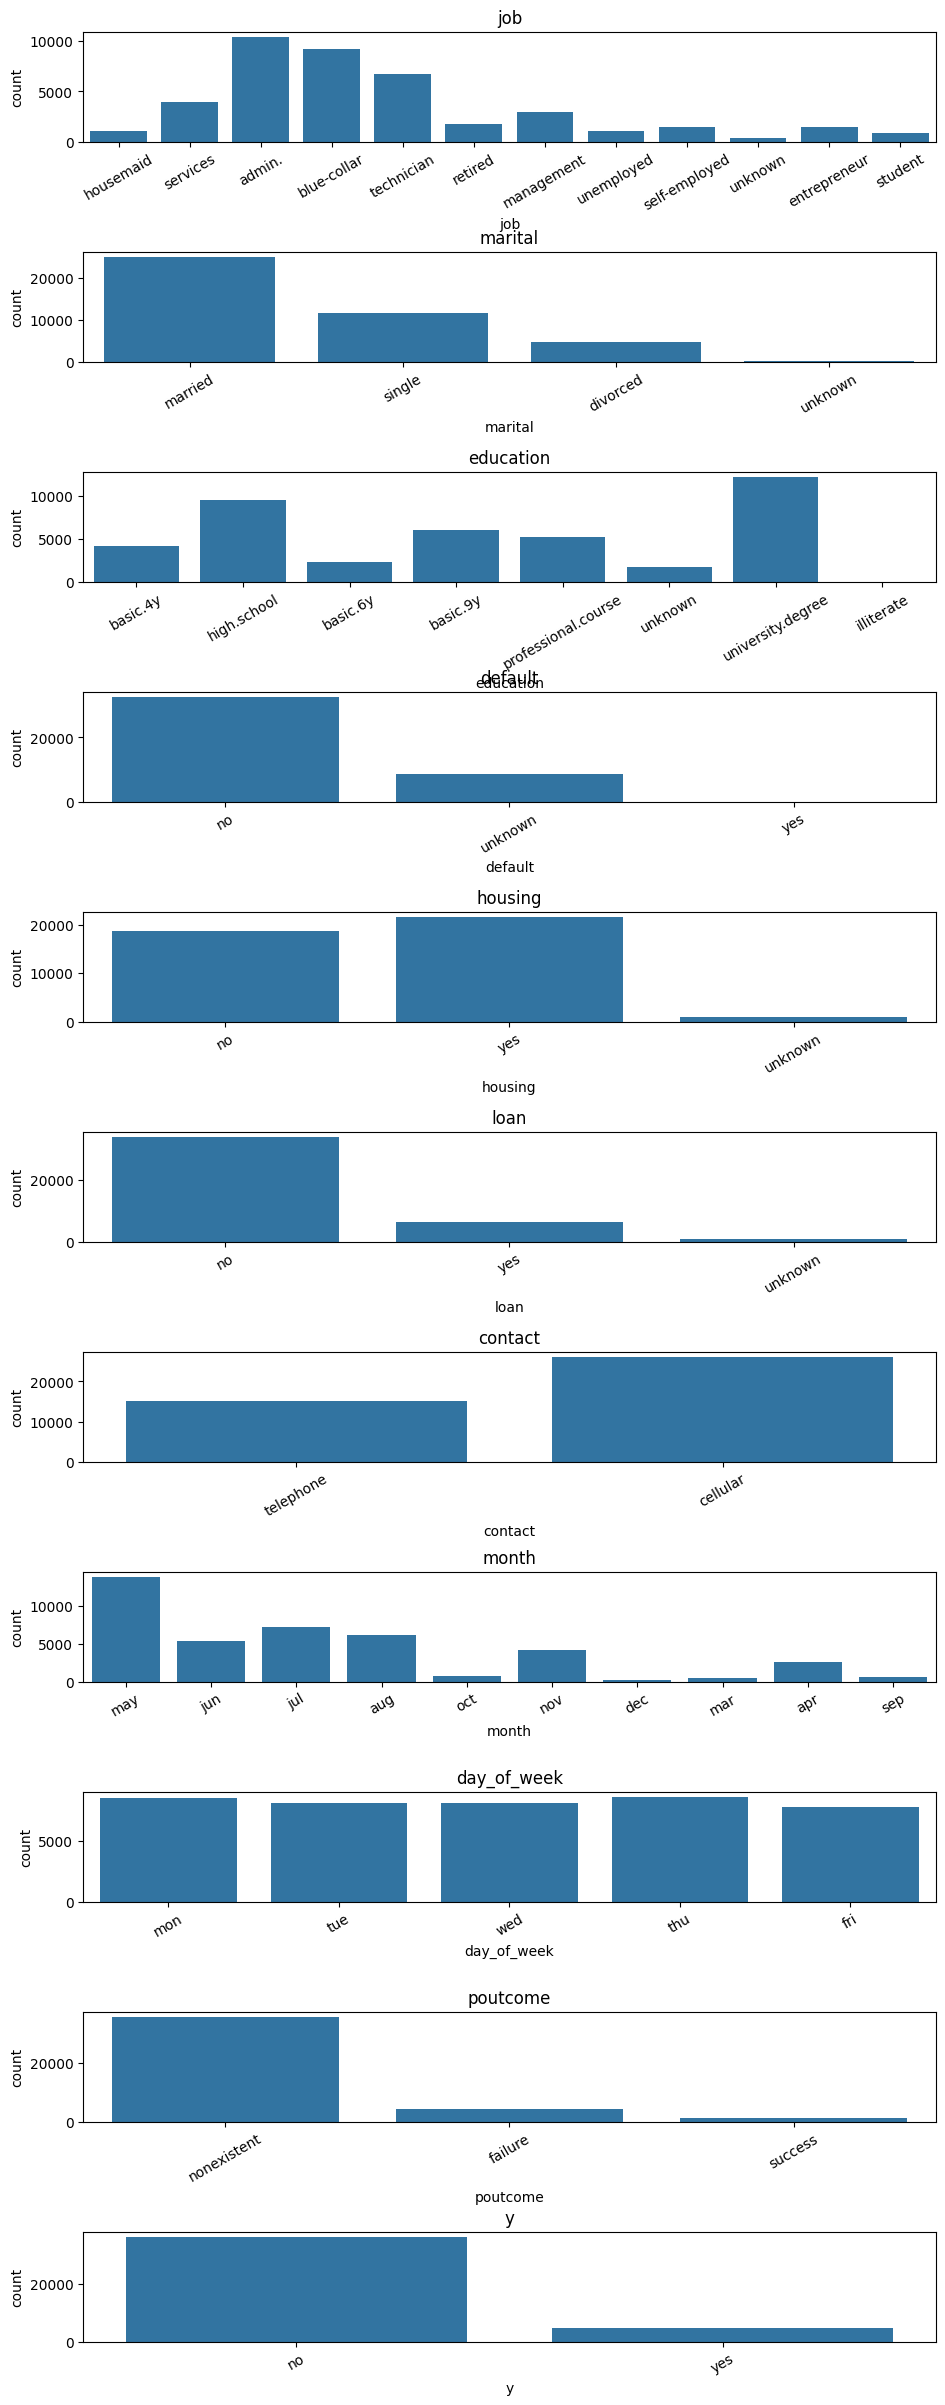

In [12]:

cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'day_of_week', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(11, 30))  # Corregido figsize
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()


Comprobamos que no hay errores tipográficos (como admin y administrador) en ninguna de las variables

# Analisis exploratorio

Mirando los gráficos correspondientes a las columnas tanto categórica como no categórica que se han hecho durante la fase de la limpieza podemos determinar que todas las columnas con informacion relativa a la llamada que se han llevado a cabo: contact, month, day_of_the_week, duration, pdays, previous no aportan información relevante sobre el cliente, sino sobre la campaña de marketing. 

Luego vamos a eliminarlas.

In [13]:
df.drop(columns=['contact','month', 'day_of_week','duration', 'campaign','pdays','previous'],inplace=True)

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Podríamos profundizar mucho más en el estudio si dispusiesemos de una columna que nos indicase de cuanto saldo disponían en su cuenta en el momento de aceptar/rechazar el préstamo. 

La ausencia de esta variable afecta mucho a la interpretación de los datos, limitándolo al número de prestamos que ha contratado (o no) sin tener en cuenta un valor tan fundamental como de cuanto dinero dispone

Variables Influyentes

In [27]:
# Separamos las variables independientes de la dependiente

#Necesitamos factorizar para convertir en numérico las variables categóricas



df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]

#Convertimos a numérico la variable independiente
dicc_y={'yes:1,no:0'}
binario=df['y'].map(dicc_y) #Para facilitar el cáculo de la tasa de conversión, creamos la equivalencia de la variable categórica
df['y_bin']=binario

X = df.drop(['y'], axis=1)
y = df['y']


#Comprobamos que la conversión se ha llevado a cabo

In [28]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

# Ajustar un modelo de regresión lineal

In [13]:

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de Cook para cada observación
cooks_distance = model.get_influence().cooks_distance



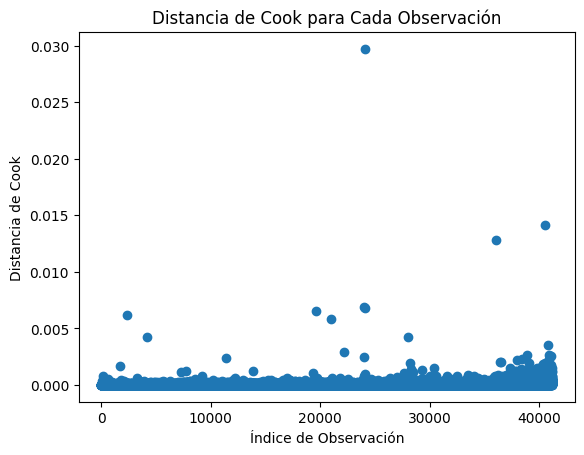

In [14]:

plt.scatter(range(len(cooks_distance[0])), cooks_distance[0])
plt.xlabel('Índice de Observación')
plt.ylabel('Distancia de Cook')
plt.title('Distancia de Cook para Cada Observación')

plt.show()


In [15]:
pto_corte = 4/len(df)

len(np.where(cooks_distance[0]>pto_corte)[0])

#np.where(cooks_distance[0]>0.05)

5255

Si tuvieramos valores que excediesen el límite que hemos marcado utilizaríamos: 

In [16]:
#df1 = df.drop(np.where(cooks_distance[0]>pto_corte)[0])

# Dividimos el data set entre train y test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección de características.

In [18]:
X_train.corr()

,const,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.00,0.04,-0.11,-0.09,0.16,-0.00,-0.00,-0.01,0.09,...,0.00,0.00,-0.04,0.02,0.03,-0.00,0.00,0.12,0.01,-0.02
job,NaN,0.04,1.00,-0.01,0.17,-0.02,0.01,-0.01,0.02,0.08,...,0.01,-0.01,-0.05,0.05,0.05,-0.08,-0.04,0.02,-0.07,-0.08
marital,NaN,-0.11,-0.01,1.00,0.06,-0.11,0.01,-0.00,0.04,0.02,...,0.00,0.00,-0.02,0.03,0.03,-0.05,-0.03,-0.05,-0.05,-0.05
education,NaN,-0.09,0.17,0.06,1.00,-0.14,0.02,-0.00,0.09,0.11,...,-0.02,-0.00,-0.03,0.02,0.03,-0.03,-0.08,0.08,-0.02,-0.03
default,NaN,0.16,-0.02,-0.11,-0.14,1.00,-0.01,0.00,-0.13,-0.13,...,-0.01,0.03,0.08,-0.10,-0.11,0.20,0.17,0.02,0.19,0.19
housing,NaN,-0.00,0.01,0.01,0.02,-0.01,1.00,0.29,0.07,0.04,...,-0.01,-0.01,-0.01,0.02,0.02,-0.05,-0.07,-0.03,-0.05,-0.04
loan,NaN,-0.00,-0.01,-0.00,-0.00,0.00,0.29,1.00,-0.01,-0.01,...,-0.00,0.01,-0.00,0.00,0.00,0.01,0.01,-0.01,0.00,0.01
contact,NaN,-0.01,0.02,0.04,0.09,-0.13,0.07,-0.01,1.00,0.43,...,0.02,-0.08,-0.12,0.21,0.23,-0.39,-0.59,-0.25,-0.40,-0.27
month,NaN,0.09,0.08,0.02,0.11,-0.13,0.04,-0.01,0.43,1.00,...,0.02,-0.08,-0.14,0.18,0.19,-0.30,-0.33,-0.06,-0.28,-0.26


Este método aplica directamente la función variance_inflation_factor al conjunto de datos original X_train (matriz de características).
Considera no solo las correlaciones entre las variables, sino también su relación directa con la respuesta en el modelo.
Es el enfoque adecuado porque el cálculo del VIF requiere evaluar la varianza explicada de cada variable X(sub i) 
en función de las otras variables, lo cual necesita los valores reales de las variables y no solo las correlaciones.


Si usamos X_train.corr: 

La matriz de correlación no contiene información sobre las escalas de las variables ni sus valores originales. Como resultado, este enfoque puede producir resultados incorrectos o indefinidos.

Error común: En muchos casos, usar la matriz de correlación da lugar al error MissingDataError si hay NaN o problemas con la matriz invertible.

In [19]:
vif = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns
)

vif


const            640570.78
age                   1.08
job                   1.05
marital               1.03
education             1.09
default               1.11
housing               1.10
loan                  1.09
contact               2.29
month                 1.38
day_of_week           1.00
duration              1.01
campaign              1.04
pdays                 2.58
previous              4.47
poutcome              6.69
emp.var.rate         39.44
cons.price.idx        9.15
cons.conf.idx         2.91
euribor3m            68.94
nr.employed          33.45
dtype: float64

<Axes: >

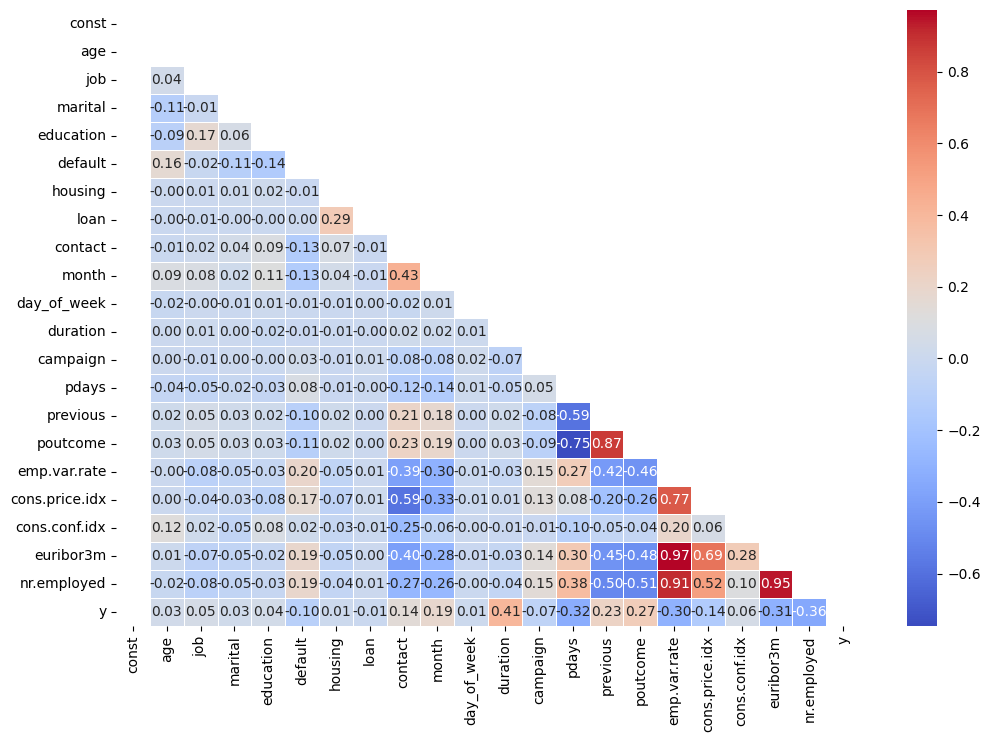

In [20]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Identificar las variables binarias

In [ ]:
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index(['const', 'contact'], dtype='object')

In [22]:
# selecciono las columnas que no son binarias
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

Instancio la clase del escalador y lo ajusto con los datos de entrenamiento

In [23]:
scaler = MinMaxScaler().fit(X_train_num)

Transformamos los datos numericos con el escalador ajustado

In [24]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [25]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=20)  # Selecciona las 20 mejores características
X_train_sc_reduced = selector.fit_transform(X_train_sc, y_train)
X_test_sc_reduced = selector.transform(X_test_sc)

In [26]:
X_train_sc

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,const,contact
0,0.15,0.91,0.00,0.29,0.00,0.50,0.50,0.22,1.00,0.06,...,1.00,0.00,0.00,1.00,0.67,0.34,0.98,1.00,1.00,0
1,0.41,0.18,0.33,0.86,0.00,0.00,0.00,0.11,0.50,0.04,...,1.00,0.00,0.00,1.00,0.88,0.38,0.96,1.00,1.00,0
2,0.15,0.18,0.33,0.86,0.00,0.00,0.00,0.33,0.25,0.02,...,1.00,0.00,0.00,1.00,0.48,0.62,0.98,1.00,1.00,1
3,0.22,0.18,0.33,0.86,0.00,0.00,0.00,0.00,0.75,0.03,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0
4,0.28,0.27,0.33,0.14,0.50,0.00,0.00,0.00,0.25,0.08,...,1.00,0.00,0.00,0.33,0.27,0.19,0.15,0.51,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32935,0.21,0.27,0.00,0.43,0.00,0.00,0.50,0.00,0.25,0.02,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0
32936,0.15,0.18,0.00,0.43,0.00,0.50,0.00,0.11,0.75,0.02,...,1.00,0.00,0.00,1.00,0.88,0.38,0.98,1.00,1.00,0
32937,0.67,0.45,0.00,0.00,0.00,0.00,0.00,0.44,0.75,0.05,...,1.00,0.29,0.50,0.00,0.09,1.00,0.03,0.20,1.00,1
32938,0.28,0.55,0.00,0.86,0.00,0.50,0.00,0.00,0.50,0.06,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0


# Selección del algoritmo regresivo

In [28]:
from lazypredict.Supervised import LazyClassifier

# Crear la instancia de LazyClassifier excluyendo los modelos no deseados
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Ajustar el modelo a los datos de entrenamiento y realizar predicciones
models, predictions = clf.fit(X_train_sc, X_test_sc, y_train, y_test)

# Mostrar los resultados
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

 97%|█████████▋| 31/32 [00:19<00:01,  1.09s/it]

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985


100%|██████████| 32/32 [00:20<00:00,  1.57it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.79               0.76     0.76      0.82   
LGBMClassifier                     0.92               0.75     0.75      0.91   
GaussianNB                         0.84               0.73     0.73      0.85   
RandomForestClassifier             0.91               0.72     0.72      0.90   
LinearDiscriminantAnalysis         0.90               0.72     0.72      0.90   
BernoulliNB                        0.81               0.72     0.72      0.83   
DecisionTreeClassifier             0.89               0.72     0.72      0.88   
BaggingClassifier                  0.91               0.72     0.72      0.90   
Perceptron                         0.90               0.69     0.69      0.89   
AdaBoostClassifier                 0.90               0.69     0.69      0.89   
ExtraTreeClassifier         

# Búsqueda de hiperparámetros

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Instanciamos el estimador
estimator = LGBMClassifier()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    n_iter=5,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy',  # Cambia la métrica si es necesario
    verbose=2,
    cv=5
)

# Ajustamos el modelo
random_search.fit(X_train_sc, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 20
[LightGBM] [Info] [bin

In [32]:

# Imprimimos los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)

Mejores parámetros: {'n_estimators': 50, 'max_depth': np.int64(40)}
Mejor puntuación: 0.9172738312082573


Modelo optimizado

In [34]:
estimator_opt = LGBMClassifier(n_estimators=50,max_depth=40)

random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111377 -> initscore=-2.076755
[LightGBM] [Info] Start training from score -2.076755
[LightGBM] [Info] Number of positive: 2935, number of negative: 23417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train se

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:

model_grid = LGBMClassifier(n_estimators=50,max_depth=40)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
y_pred

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985


array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [39]:
acc_grid = accuracy_score(y_test, y_pred)
print(f"the new accuracy is {acc_grid}")

the new accuracy is 0.916221466731423


# Evaluación del modelo

In [53]:
y_pred_train = random_search.best_estimator_.predict(X_train_sc)
y_pred_test = random_search.best_estimator_.predict(X_test_sc)
y_train_eu = y_train
y_test_eu = y_test

In [54]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular las métricas para entrenamiento
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)*100
    r2_train = r2_score(y_train, y_pred_train)

    # Calcular las métricas para test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)*100
    r2_test = r2_score(y_test, y_pred_test)

    # Calcular las diferencias
    mae_diff = mae_test - mae_train
    mape_diff = mape_test - mape_train
    r2_diff = r2_test - r2_train

    # Crear el DataFrame
    metrics_df = pd.DataFrame({
        'MAE': [mae_train, mae_test, mae_diff],
        'MAPE': [mape_train, mape_test, mape_diff],
        'R2': [r2_train, r2_test, r2_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df

In [55]:
calculate_metrics(y_train_eu, y_test_eu, y_pred_train, y_pred_test)

,MAE,MAPE,R2
Train,0.07,11826392464102854.00,0.29
Test,0.08,13014287412751076.00,0.19
Difference,0.01,1187894948648222.00,-0.10
